In [1]:
import mysql.connector
import pandas as pd
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline
rc('font', family='Malgun Gothic')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10) 

## db 접속

In [2]:
dotenv_path = "../.env"
load_dotenv(dotenv_path)

db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_name = os.getenv("DB_NAME")

In [3]:
conn = mysql.connector.connect(
    host = db_host,
    port = db_port,
    database = db_name,
    user = db_user,
    password = db_password
)

mycursor = conn.cursor()

In [4]:
mycursor.execute('show tables;')

for x in mycursor:
    print(x)

('customer',)
('discount',)
('marketing',)
('product',)
('rfm',)
('sales',)
('tax',)


## 최근 거래일과 가입기간, 거래기간

In [5]:
sql = '''
SELECT s.CustomerID, 
       c.SubscriptionPeriod,
       MIN(s.TransactionDate) AS 최초거래일, 
       MAX(s.TransactionDate) AS 최근거래일
FROM sales s
JOIN customer c ON s.CustomerID = c.CustomerID
GROUP BY s.CustomerID, c.SubscriptionPeriod;
'''
def show_sql_result(sql):
       mycursor.execute(sql)
       rows = mycursor.fetchall()
       columns = [column[0] for column in mycursor.description]
       table_data = pd.DataFrame(rows, columns=columns)
       return table_data

show_sql_result(sql)

,CustomerID,SubscriptionPeriod,최초거래일,최근거래일
0,USER_0000,31,2019-09-15,2019-09-15
1,USER_0001,20,2019-03-24,2019-11-02
2,USER_0002,39,2019-06-22,2019-10-19
3,USER_0003,25,2019-12-14,2019-12-14
4,USER_0004,31,2019-09-15,2019-09-15
...,...,...,...,...
1463,USER_1463,5,2019-04-05,2019-04-05
1464,USER_1464,43,2019-06-22,2019-10-05
1465,USER_1465,25,2019-04-05,2019-06-20
1466,USER_1466,47,2019-10-23,2019-10-23


In [6]:
sql = '''
SELECT s.CustomerID, 
       c.SubscriptionPeriod,
       MIN(s.TransactionDate) AS 최초거래일, 
       MAX(s.TransactionDate) AS 최근거래일,
       TIMESTAMPDIFF(MONTH, MIN(s.TransactionDate), MAX(s.TransactionDate)) + 1 AS 거래기간
FROM sales s
JOIN customer c ON s.CustomerID = c.CustomerID
GROUP BY s.CustomerID
HAVING 거래기간 > c.SubscriptionPeriod;
'''
show_sql_result(sql)

,CustomerID,SubscriptionPeriod,최초거래일,최근거래일,거래기간
0,USER_0034,2,2019-01-11,2019-10-30,10
1,USER_0147,8,2019-01-09,2019-11-12,11
2,USER_0200,5,2019-02-09,2019-08-31,7
3,USER_0203,4,2019-01-16,2019-09-30,9
4,USER_0270,2,2019-03-27,2019-07-08,4
5,USER_0353,7,2019-01-14,2019-12-13,11
6,USER_0370,5,2019-03-28,2019-12-19,9
7,USER_0415,6,2019-04-03,2019-11-21,8
8,USER_0424,5,2019-03-09,2019-12-18,10
9,USER_0441,5,2019-01-29,2019-12-18,11


- 거래기간보다 가입기간이 짧은 고객 : 39명(2.7%)
    - 단순 오류?
- 가입 기간 산정 방식
    - 19년 12월 기준 : 잘 안 맞는 데이터가 많음
    - 최근 거래일 기준 : 최초 가입일로부터 최근 거래일까지의 기간
    - 별도 서비스 가입 : 홍보 메일 수신, 유료 구독 서비스 등 별도 서비스 가입 기간을 계산

## 매출, ARPU

In [7]:
sql = '''
Select CustomerID, TransactionID, ProductID, ProductCategory, Quantity, AverageAmount, CouponStatus, (Quantity * AverageAmount) as 매출 
From sales
GROUP BY CustomerID, TransactionID
;
'''
show_sql_result(sql)

,CustomerID,TransactionID,ProductID,ProductCategory,Quantity,AverageAmount,CouponStatus,매출
0,USER_0000,Transaction_16900,Product_0048,Apparel,1,19.99,Used,19.99
1,USER_0001,Transaction_20178,Product_0905,Office,1,2.39,Used,2.39
2,USER_0001,Transaction_20179,Product_0195,Lifestyle,3,3.19,Clicked,9.57
3,USER_0001,Transaction_20180,Product_0989,Nest-USA,1,149.00,Not Used,149.00
4,USER_0001,Transaction_20181,Product_0989,Nest-USA,1,149.00,Clicked,149.00
...,...,...,...,...,...,...,...,...
26626,USER_1467,Transaction_18634,Product_0992,Nest,1,99.00,Clicked,99.00
26627,USER_1467,Transaction_18635,Product_0880,Drinkware,4,2.99,Not Used,11.96
26628,USER_1467,Transaction_18636,Product_0837,Apparel,1,15.19,Used,15.19
26629,USER_1467,Transaction_18637,Product_0095,Apparel,1,15.00,Used,15.00


- 동일 상품, 같은 쿠폰 적용에도 평균 금액이 다른 이유
    - 상품 옵션에 따라(ex. 크기, 부가옵션 등)

In [8]:
sql = '''
SELECT 
    SUM(매출) AS 총매출, 
    COUNT(DISTINCT CustomerID) AS 총고객수, 
    ROUND(SUM(매출) / COUNT(DISTINCT CustomerID), 2) AS ARPU
FROM (
    SELECT 
        CustomerID, 
        TransactionID, 
        SUM(Quantity * AverageAmount) AS 매출
    FROM sales
    GROUP BY CustomerID, TransactionID
) AS 매출_합계
;
'''
show_sql_result(sql)

,총매출,총고객수,ARPU
0,4670794.62,1468,3181.74


In [9]:
sql = '''
SELECT 
    count(DISTINCT CustomerID) AS 총고객수
FROM
    customer
;
'''
show_sql_result(sql)

,총고객수
0,1468


- 고객 명부 상 모든 고객이 구매를 했으므로 ARPU = ARPPU

In [10]:
sql = '''
SELECT 
    DATE_FORMAT(TransactionDate, '%Y-%m') AS 월, 
    COUNT(DISTINCT CustomerID) AS 월별_구매고객,
    ROUND(SUM(매출), 2) AS 월별_매출,
    ROUND(SUM(매출) / COUNT(DISTINCT CustomerID), 2) AS 월별_ARPPU
FROM(
    SELECT 
        CustomerID,
        TransactionDate,
        SUM(Quantity * AverageAmount) AS 매출
    FROM
        sales
    GROUP BY
        CustomerID, TransactionDate
) AS 매출_합계
GROUP BY 월
ORDER BY 월
;
'''
month_arppu = show_sql_result(sql)
month_arppu

,월,월별_구매고객,월별_매출,월별_ARPPU
0,2019-01,215,403624.58,1877.32
1,2019-02,109,310819.80,2851.56
2,2019-03,208,349608.09,1680.81
3,2019-04,224,401618.42,1792.94
4,2019-05,200,307763.42,1538.82
5,2019-06,259,321081.38,1239.70
6,2019-07,236,372638.07,1578.97
7,2019-08,300,401210.37,1337.37
8,2019-09,193,360548.40,1868.13
9,2019-10,210,409681.28,1950.86


In [11]:
month_arppu['월별_매출'] = month_arppu['월별_매출'].astype(float)
month_arppu['월별_ARPU'] = round(month_arppu.월별_매출 / 1468, 2)
month_arppu

,월,월별_구매고객,월별_매출,월별_ARPPU,월별_ARPU
0,2019-01,215,403624.58,1877.32,274.95
1,2019-02,109,310819.80,2851.56,211.73
2,2019-03,208,349608.09,1680.81,238.15
3,2019-04,224,401618.42,1792.94,273.58
4,2019-05,200,307763.42,1538.82,209.65
5,2019-06,259,321081.38,1239.70,218.72
6,2019-07,236,372638.07,1578.97,253.84
7,2019-08,300,401210.37,1337.37,273.30
8,2019-09,193,360548.40,1868.13,245.61
9,2019-10,210,409681.28,1950.86,279.07


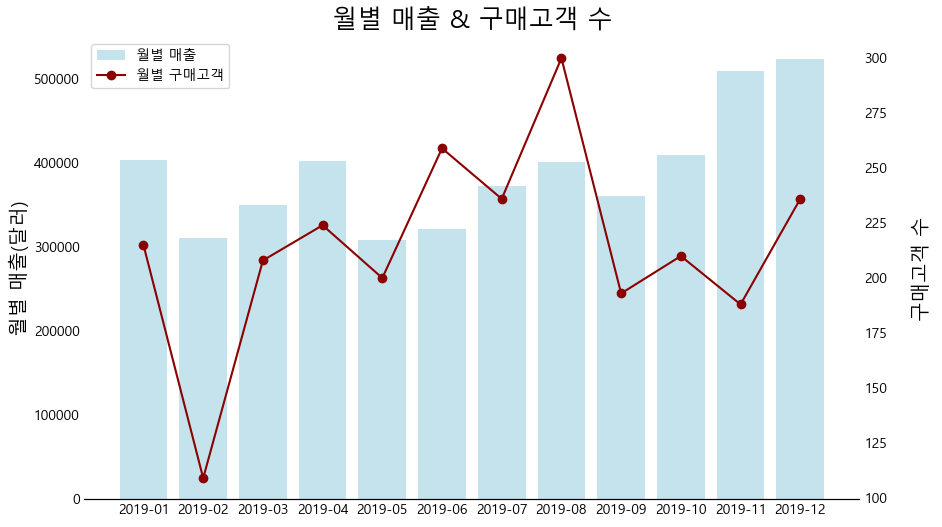

In [12]:
plt.figure(figsize=(10, 6))

ax1 = plt.gca()
ax1.bar(month_arppu.월, month_arppu.월별_매출, color='lightblue', alpha=0.7, label='월별 매출')
ax1.set_ylabel('월별 매출(달러)', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(month_arppu.월, month_arppu.월별_구매고객, color='darkred', marker='o', label='월별 구매고객')
ax2.set_ylabel('구매고객 수', fontsize=14)

ax1.yaxis.set_tick_params(size=0)
ax2.yaxis.set_tick_params(size=0)
ax1.xaxis.set_tick_params(size=0)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.yaxis.set_label_coords(-0.07, 0.5)
ax2.yaxis.set_label_coords(1.07, 0.5)

plt.title('월별 매출 & 구매고객 수', fontsize=18)
plt.show()

- 구매 고객 수가 전월 대비 증가하면 매출 역시 전월 대비 증가하는 경향

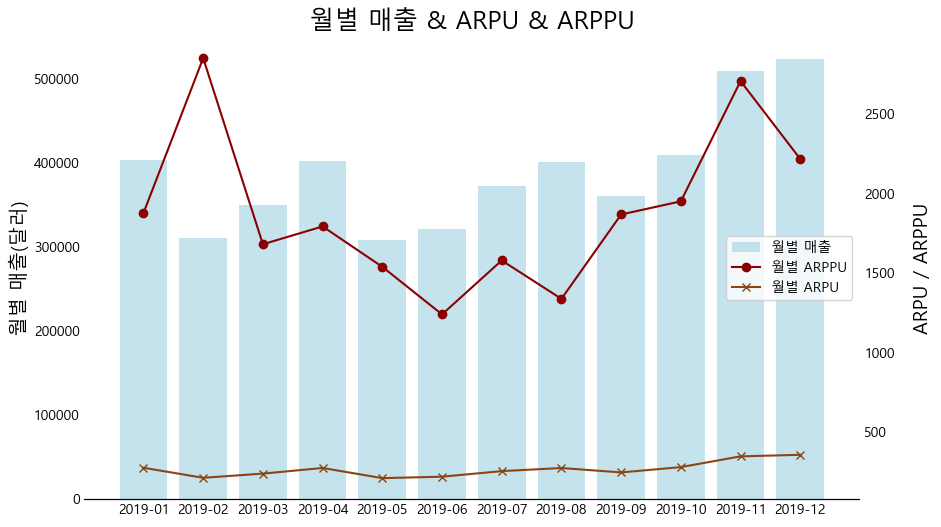

In [13]:
plt.figure(figsize=(10, 6))

ax1 = plt.gca()
ax1.bar(month_arppu.월, month_arppu.월별_매출, color='lightblue', alpha=0.7, label='월별 매출')
ax1.set_ylabel('월별 매출(달러)', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(month_arppu.월, month_arppu.월별_ARPPU, color='darkred', marker='o', label='월별 ARPPU')
ax2.plot(month_arppu.월, month_arppu.월별_ARPU, color='saddlebrown', marker='x', label='월별 ARPU')
ax2.set_ylabel('ARPU / ARPPU', fontsize=14)

ax1.yaxis.set_tick_params(size=0)
ax2.yaxis.set_tick_params(size=0)
ax1.xaxis.set_tick_params(size=0)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

ax1.yaxis.set_label_coords(-0.07, 0.5)
ax2.yaxis.set_label_coords(1.07, 0.5)

plt.title('월별 매출 & ARPU & ARPPU', fontsize=18)
plt.show()

- ARPU보다는 실제 구매 구매 고객을 대상으로 한 ARPPU가 매출과의 상관도가 더 높음

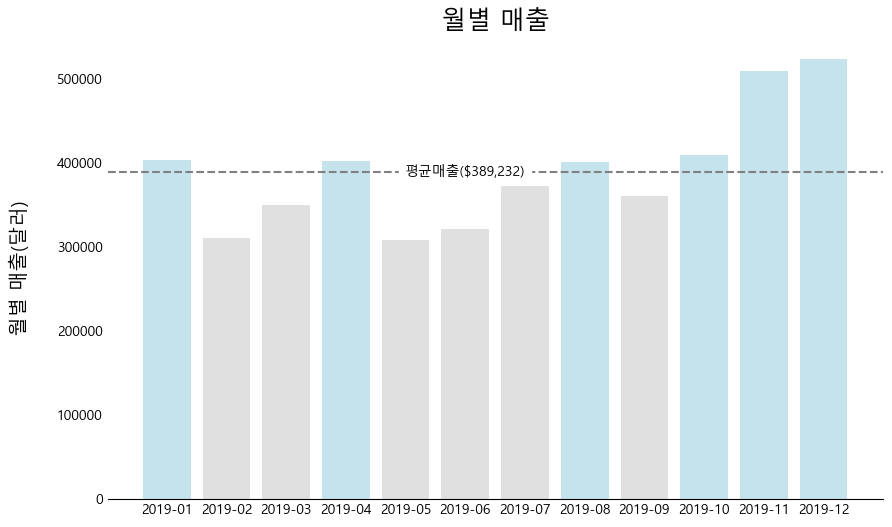

In [14]:
월별매출평균 = month_arppu.월별_매출.mean()
colors = ['lightblue' if 매출 >= 월별매출평균 else 'lightgray' for 매출 in month_arppu.월별_매출]
plt.figure(figsize=(10, 6))

ax1 = plt.gca()
ax1.bar(month_arppu.월, month_arppu.월별_매출, color=colors, alpha=0.7, label='월별 매출')
ax1.set_ylabel('월별 매출(달러)', fontsize=14)

ax1.axhline(월별매출평균, color='grey', linewidth=1.5, linestyle='--', label='평균 매출')
ax1.text(6, 월별매출평균, f'평균매출(${int(월별매출평균):,})', va='center', ha='right', backgroundcolor='w')

ax1.yaxis.set_tick_params(size=0)
ax1.xaxis.set_tick_params(size=0)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.set_label_coords(-0.1, 0.5)

plt.title('월별 매출', fontsize=18)
plt.show()

In [15]:
sql = '''
SELECT 
    DAYNAME(TransactionDate) AS 요일,
    ROUND(SUM(매출) / COUNT(DISTINCT TransactionDate), 2) AS 요일별_평균_매출
FROM (
    SELECT 
        CustomerID,
        TransactionDate,
        SUM(Quantity * AverageAmount) AS 매출
    FROM
        sales
    GROUP BY
        CustomerID, TransactionDate
) AS 매출_합계
GROUP BY 요일
ORDER BY WEEKDAY(TransactionDate);
;
'''
week_sale = show_sql_result(sql)
week_sale

,요일,요일별_평균_매출
0,Monday,7031.29
1,Tuesday,7487.16
2,Wednesday,15896.58
3,Thursday,16162.19
4,Friday,16769.32
5,Saturday,12943.62
6,Sunday,13388.83


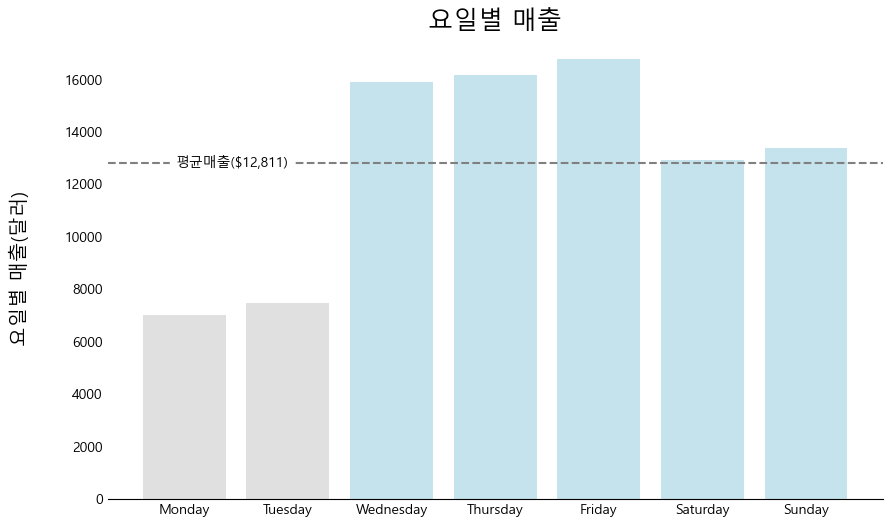

In [16]:
요일별매출평균 = week_sale.요일별_평균_매출.mean()
colors = ['lightblue' if 매출 >= 요일별매출평균 else 'lightgray' for 매출 in week_sale.요일별_평균_매출]
plt.figure(figsize=(10, 6))

ax1 = plt.gca()
ax1.bar(week_sale.요일, week_sale.요일별_평균_매출, color=colors, alpha=0.7, label='월별 매출')
ax1.set_ylabel('요일별 매출(달러)', fontsize=14)

ax1.axhline(요일별매출평균, color='grey', linewidth=1.5, linestyle='--', label='평균 매출')
ax1.text(1, 요일별매출평균, f'평균매출(${int(요일별매출평균):,})', va='center', ha='right', backgroundcolor='w')

ax1.yaxis.set_tick_params(size=0)
ax1.xaxis.set_tick_params(size=0)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.set_label_coords(-0.1, 0.5)

plt.title('요일별 매출', fontsize=18)
plt.show()

In [17]:
sql = '''
SELECT 
    DAYNAME(TransactionDate) AS 요일,
    COUNT(TransactionID) AS 요일별_평균_판매건수
FROM 
    sales
GROUP BY 
    DAYNAME(TransactionDate), WEEKDAY(TransactionDate)
ORDER BY 
    WEEKDAY(TransactionDate);;
;
'''
week_transaction = show_sql_result(sql)
week_transaction

,요일,요일별_평균_판매건수
0,Monday,4464
1,Tuesday,4611
2,Wednesday,8887
3,Thursday,9000
4,Friday,9266
5,Saturday,8177
6,Sunday,8519


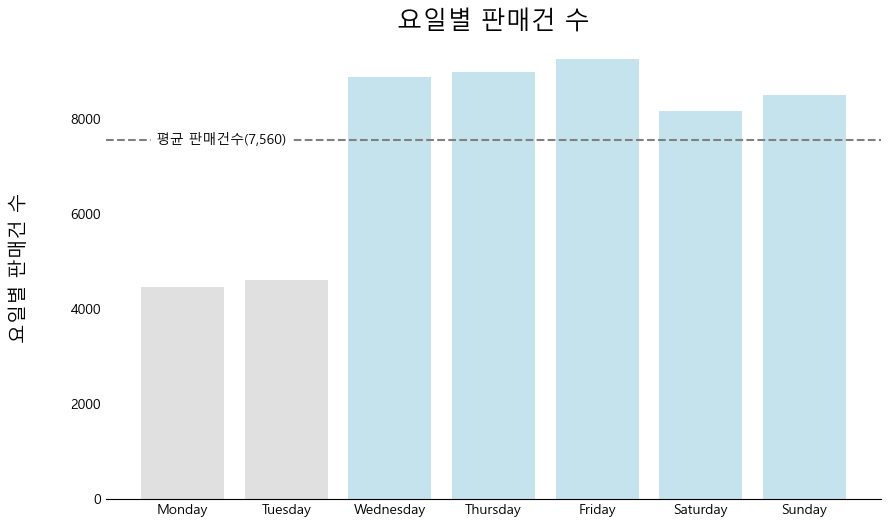

In [18]:
요일별평균판매건수 = week_transaction.요일별_평균_판매건수.mean()
colors = ['lightblue' if 판매량 >= 요일별평균판매건수 else 'lightgray' for 판매량 in week_transaction.요일별_평균_판매건수]
plt.figure(figsize=(10, 6))

ax1 = plt.gca()
ax1.bar(week_transaction.요일, week_transaction.요일별_평균_판매건수, color=colors, alpha=0.7, label='요일별 판매건 수')
ax1.set_ylabel('요일별 판매건 수', fontsize=14)

ax1.axhline(요일별평균판매건수, color='grey', linewidth=1.5, linestyle='--', label='평균 판매건 수')
ax1.text(1, 요일별평균판매건수, f'평균 판매건수({int(요일별평균판매건수):,})', va='center', ha='right', backgroundcolor='w')

ax1.yaxis.set_tick_params(size=0)
ax1.xaxis.set_tick_params(size=0)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.set_label_coords(-0.1, 0.5)

plt.title('요일별 판매건 수', fontsize=18)
plt.show()

## 매출 변화 원인 파악
- 매출 = ARPPU * 구매 고객 수
- 매출변화는 ARPPU나 구매 고객 수의 복합적인 영향
>매출 증가 3가지 시나리오
- ARPU 증가 & 구매 고객 수 유지
- ARPU 유지 & 구매 고객 수 증가
- ARPU 증가 & 구매 고객 수 증가
- 매출 감소도 동일하게 생각할 수 있음

In [19]:
import numpy as np

# 매출 증가/감소 분석
month_arppu['매출_변화'] = month_arppu['월별_매출'].diff()
month_arppu['구매고객_변화'] = month_arppu['월별_구매고객'].diff()
month_arppu['ARPPU_변화'] = month_arppu['월별_ARPPU'].diff()

# 증가 사유 분류
conditions = [
    (month_arppu['매출_변화'] > 0) & (month_arppu['구매고객_변화'] <= 0) & (month_arppu['ARPPU_변화'] > 0), # ARPPU 증가
    (month_arppu['매출_변화'] > 0) & (month_arppu['구매고객_변화'] > 0) & (month_arppu['ARPPU_변화'] <= 0), # 구매 고객 증가
    (month_arppu['매출_변화'] > 0) & (month_arppu['구매고객_변화'] > 0) & (month_arppu['ARPPU_변화'] > 0),  # 둘 다 증가
    (month_arppu['매출_변화'] < 0) & (month_arppu['구매고객_변화'] >= 0) & (month_arppu['ARPPU_변화'] < 0), # ARPPU 감소
    (month_arppu['매출_변화'] < 0) & (month_arppu['구매고객_변화'] < 0) & (month_arppu['ARPPU_변화'] >= 0), # 구매 고객 감소
    (month_arppu['매출_변화'] < 0) & (month_arppu['구매고객_변화'] < 0) & (month_arppu['ARPPU_변화'] < 0)  # 둘 다 감소
]

choices = ['ARPPU 증가', '구매 고객 증가', '구매 고객 및 ARPPU 증가', 'ARPPU 감소', '구매 고객 감소', '구매 고객 및 ARPPU 감소']

month_arppu['변화_사유'] = np.select(conditions, choices, default='감소 혹은 변화 없음')
month_arppu[['월', '매출_변화', '구매고객_변화', 'ARPPU_변화', '변화_사유']]

,월,매출_변화,구매고객_변화,ARPPU_변화,변화_사유
0,2019-01,NaN,NaN,NaN,감소 혹은 변화 없음
1,2019-02,-92804.78,-106.0,974.24,구매 고객 감소
2,2019-03,38788.29,99.0,-1170.75,구매 고객 증가
3,2019-04,52010.33,16.0,112.13,구매 고객 및 ARPPU 증가
4,2019-05,-93855.00,-24.0,-254.12,구매 고객 및 ARPPU 감소
5,2019-06,13317.96,59.0,-299.12,구매 고객 증가
6,2019-07,51556.69,-23.0,339.27,ARPPU 증가
7,2019-08,28572.30,64.0,-241.60,구매 고객 증가
8,2019-09,-40661.97,-107.0,530.76,구매 고객 감소
9,2019-10,49132.88,17.0,82.73,구매 고객 및 ARPPU 증가


1. 구매 고객 수의 변화가 매출에 중요한 영향
2. ARPPU 변화도 매출에 영향을 미치지만 구매고객 변화만큼 직접적이지 않음. 
3. 하지만 구매 고객 수가 정체되거나 증가율이 둔화된다면 ARPPU를 증가시키는 것이 성장을 위한 전략이 될 수 있음
4. 실제로 9~12월을 보면 구매고객의 증가가 크지 않지만 Nest 관련 상품의 매출 증가로 ARPPU가 증가한 것이 매출 성장을 견인함
5. 구매고객과 ARPPU가 동시에 증가하거나 감소할 때 매출 변화가 더 명확함
> 고객 유치 및 유지 전략 필요
- ARPPU가 매출 증가에 더 중요한 요소라면 고객 가치를 높이기 위해 프리미엄 제품 제공이나 고가 전략을 구사할 수 있음
- 하지만, 본 데이터에선 구매고객 수가 매출에 더 중요한 요소인만큼 고객수를 늘리기 위한 마케팅이 중요

## 제품별, 카테고리별 판매

#### 월별 최다 판매 제품

In [20]:
sql = '''
WITH MonthlySale AS (
    SELECT
        DATE_FORMAT(TransactionDate, '%Y-%m') AS 월,
        ProductID,
        ProductCategory,
        SUM(Quantity) AS 판매량
    FROM
        sales
    GROUP BY
        월, ProductID, ProductCategory
),
TotalMonthlySale AS (
    SELECT
        월,
        SUM(판매량) OVER(PARTITION BY 월) AS 월별전체판매량
    FROM
        MonthlySale
),
RankedSale AS (
    SELECT
        MonthlySale.월,
        ProductID,
        ProductCategory,
        판매량,
        월별전체판매량,
        ROW_NUMBER() OVER (PARTITION BY MonthlySale.월 ORDER BY 판매량 DESC) AS 판매순위
    FROM
        MonthlySale
    JOIN
        TotalMonthlySale ON MonthlySale.월 = TotalMonthlySale.월
)
SELECT 
    월,
    ProductID AS 최다판매제품,
    ProductCategory AS 최대판매제품분류,
    판매량 AS 최대판매제품_판매량,
    월별전체판매량
FROM
    RankedSale
WHERE
    판매순위=1
ORDER BY
    월
;
'''
mothly_product = show_sql_result(sql)
mothly_product

,월,최다판매제품,최대판매제품분류,최대판매제품_판매량,월별전체판매량
0,2019-01,Product_0914,Office,2470,20140
1,2019-02,Product_0914,Office,1009,16575
2,2019-03,Product_0914,Office,1358,20787
3,2019-04,Product_0916,Lifestyle,959,25277
4,2019-05,Product_0914,Office,922,18715
5,2019-06,Product_0914,Office,2813,21619
6,2019-07,Product_0880,Drinkware,1182,22898
7,2019-08,Product_0914,Office,1858,27457
8,2019-09,Product_0942,Office,960,19353
9,2019-10,Product_0914,Office,2270,17425


#### 19년도 최다 판매 제품 상위 10개

In [21]:
sql = '''
SELECT 
    ProductID,
    ProductCategory,
    SUM(Quantity) AS 19년도_판매량
FROM
    sales
GROUP BY
    ProductID, ProductCategory
ORDER BY
    19년도_판매량 DESC
;
'''
mothly_product = show_sql_result(sql)
mothly_product.head(20)

,ProductID,ProductCategory,19년도_판매량
0,Product_0914,Office,16234
1,Product_0880,Drinkware,9728
2,Product_0854,Bags,7321
3,Product_0969,Office,6496
4,Product_0904,Office,5847
5,Product_0907,Lifestyle,5549
6,Product_0983,Nest-USA,5206
7,Product_0908,Drinkware,5098
8,Product_0942,Office,4861
9,Product_0981,Nest-USA,4570


- Office 제품이 다수
- 고가의 Nest-USA 제품도 2개

In [22]:
sql = '''
SELECT 
    ProductID,
    ProductCategory,
    SUM(Quantity) AS 19년도_판매량,
    ROUND(AVG(AverageAmount), 2) AS 제품_평균가격,
    SUM(Quantity * AverageAmount) AS 제품별_매출액
FROM
    sales
GROUP BY
    ProductID, ProductCategory
ORDER BY
    제품별_매출액 DESC
;
'''
product_sales = show_sql_result(sql)
product_sales.head(20)

,ProductID,ProductCategory,19년도_판매량,제품_평균가격,제품별_매출액
0,Product_0981,Nest-USA,4570,150.98,688916.34
1,Product_0983,Nest-USA,5206,121.81,629977.12
2,Product_0976,Nest-USA,4402,120.21,528612.93
3,Product_0984,Nest-USA,2683,79.84,213819.16
4,Product_0985,Nest-USA,2670,79.75,212495.57
5,Product_0989,Nest-USA,1368,149.64,204666.40
6,Product_0994,Nest,510,351.29,179142.54
7,Product_0990,Nest,771,199.92,154112.52
8,Product_0992,Nest,1091,99.67,108704.24
9,Product_0980,Nest-USA,472,149.56,70604.48


- 매출액 기준으론 Nest 관련 상품들이 매출액 상위를 다수 차지

In [23]:
sql = '''
SELECT
    ProductCategory,
    SUM(Quantity) AS 판매량,
    ROUND(AVG(Quantity), 2) AS 평균구입개수,
    ROUND(AVG(AverageAmount), 2) AS 평균가격,
    SUM(Quantity * AverageAmount) AS 매출액
FROM
    sales
GROUP BY
    ProductCategory
;
'''
cat_sum = show_sql_result(sql)
cat_sum

,ProductCategory,판매량,평균구입개수,평균가격,매출액
0,Accessories,1097,4.69,8.21,7295.88
1,Android,45,1.05,15.90,711.03
2,Apparel,32438,1.79,19.79,591145.80
3,Backpacks,113,1.27,80.05,8772.69
4,Bags,15273,8.12,29.83,151314.43
5,Bottles,2090,7.80,3.44,6923.65
6,Drinkware,30501,8.76,10.70,200707.83
7,Fun,834,5.21,6.74,6029.01
8,Gift Cards,206,1.30,111.36,19533.82
9,Google,575,5.48,16.45,9420.47


- Housewares,  Notebooks&Journals, Office 카테고리 제품들은 제품별 평균가격이 낮고, 대량 구입이 많음

In [24]:
cat_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductCategory  20 non-null     object
 1   판매량              20 non-null     object
 2   평균구입개수           20 non-null     object
 3   평균가격             20 non-null     object
 4   매출액              20 non-null     object
dtypes: object(5)
memory usage: 928.0+ bytes


In [25]:
cat_sum['매출액'] = cat_sum['매출액'].astype(float)
cat_sum['판매량'] = cat_sum['판매량'].astype(float)

In [26]:
total_sales = cat_sum['매출액'].sum()
total_quantity = cat_sum['판매량'].sum()
cat_sum['매출액_비중'] = round((cat_sum['매출액'] / total_sales) * 100, 2)
cat_sum['판매량_비중'] = round((cat_sum['판매량'] / total_quantity) * 100, 2)

cat_sum[['ProductCategory', '판매량_비중', '매출액_비중']].sort_values(by='판매량_비중', ascending=False)

,ProductCategory,판매량_비중,매출액_비중
18,Office,37.13,5.93
2,Apparel,13.63,12.66
6,Drinkware,12.81,4.30
12,Lifestyle,10.45,1.59
16,Nest-USA,9.00,54.68
4,Bags,6.42,3.24
17,Notebooks & Journals,4.01,2.29
10,Headgear,1.48,1.14
14,Nest,1.19,11.09
11,Housewares,1.04,0.10


- 가장 많이 판매된 제품카테고리는 Office
    - 전체 판매량의 37.13%을 차지하지만, 매출액 비중은 5.93%에 불과
    - Office 제품의 평균가격은 3.77불
- Apparel이 판매량 2위: 전체 판매량의 13.63%, 매출액 비중은 12.66%
- Drinkware, Lifestyle의 제품들도 판매량은 많지만 매출액 비중이 작음
- Nest-USA는 판매량은 9%에 불과히지만 전체 매출액의 54.68%
    - Nest 관련 카테고리가 전체 판매량의 10.39%, 전체 매출액의 67.29%
    - Nest 관련 제품의 평균가격은 120불 이상

> 매출증가를 위해선 Nest 제품 판매 증가가 핵심

> 판매량 대비 매출액 비중이 낮은 제품들에 대한 방안 마련

In [27]:
sql = '''
SELECT
    DATE_FORMAT(TransactionDate, '%Y-%m') AS 월,
    ProductCategory,
    SUM(Quantity) AS 판매량,
    SUM(Quantity * AverageAmount) AS 매출액
FROM
    sales
WHERE
    ProductCategory IN ('Nest', 'Nest-USA', 'Nest-Canada', 'Office', 'Apparel')
GROUP BY
    월, ProductCategory
ORDER BY
    월, ProductCategory
;
'''
major_sales = show_sql_result(sql)
major_sales

,월,ProductCategory,판매량,매출액
0,2019-01,Apparel,1500,38300.87
1,2019-01,Nest-Canada,63,9591.11
2,2019-01,Nest-USA,2261,284362.08
3,2019-01,Office,10237,27309.50
4,2019-02,Apparel,1559,37990.09
...,...,...,...,...
48,2019-12,Apparel,2676,48236.94
49,2019-12,Nest,944,145354.52
50,2019-12,Nest-Canada,34,5291.29
51,2019-12,Nest-USA,2289,280190.12


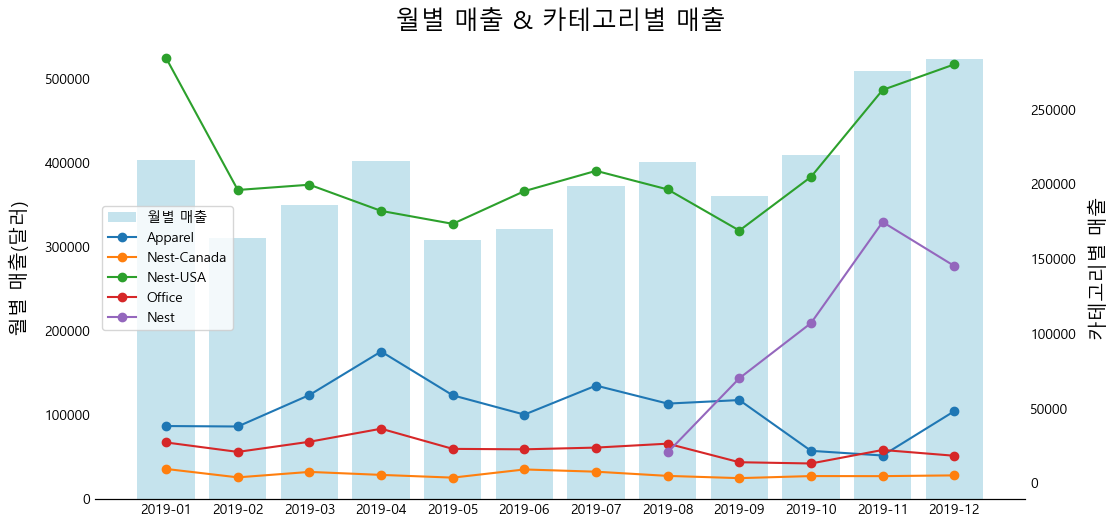

In [28]:
plt.figure(figsize=(12, 6))

ax1 = plt.gca()
ax1.bar(month_arppu.월, month_arppu.월별_매출, color='lightblue', alpha=0.7, label='월별 매출')
ax1.set_ylabel('월별 매출(달러)', fontsize=14)

ax2 = ax1.twinx()
categories = major_sales['ProductCategory'].unique()
for cat in categories:
    filtered_data = major_sales[major_sales['ProductCategory']==cat]
    ax2.plot(filtered_data.월, filtered_data.매출액, marker='o', label=cat)
ax2.set_ylabel('카테고리별 매출', fontsize=14)

ax1.yaxis.set_tick_params(size=0)
ax2.yaxis.set_tick_params(size=0)
ax1.xaxis.set_tick_params(size=0)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

ax1.yaxis.set_label_coords(-0.07, 0.5)
ax2.yaxis.set_label_coords(1.07, 0.5)

plt.title('월별 매출 & 카테고리별 매출', fontsize=18)
plt.show()

- 2~4월의 매출 상승은 Apparel 상품 매출 증가 영향
- 9~12월 매출 상승은 대체로 Nest-USA, Nest 매출 증가가 견인
- Nest는 8월부터 매출이 발생했으나 전체 매출액 비중이 11%(전체 3위) -> 후반기 매출 비중은 Nest-USA에 이어 2위
    - Nest 제품 추가로 20년에는 19년 대비 매출 상승 기대

## 고객별 매출

In [29]:
sql = '''
SELECT
    s.CustomerID,
    c.Gender,
    c.Region,
    COUNT(DISTINCT TransactionID) AS 주문수,
    SUM(Quantity * AverageAmount) AS 매출액
FROM
    sales s
JOIN
    customer c ON s.CustomerID = c.CustomerID
GROUP BY
    CustomerID
ORDER BY
    매출액 DESC
;
'''
customer_sales = show_sql_result(sql)
customer_sales.head(20)

,CustomerID,Gender,Region,주문수,매출액
0,USER_0736,여,Chicago,291,75937.55
1,USER_0118,여,Chicago,328,74601.36
2,USER_0563,여,Chicago,289,57137.79
3,USER_0643,여,California,276,48980.38
4,USER_1355,남,California,263,46205.77
5,USER_1218,여,California,139,35574.46
6,USER_1358,남,Chicago,177,34551.40
7,USER_0202,여,New Jersey,176,27199.61
8,USER_0667,여,Chicago,148,26671.30
9,USER_0578,여,California,71,26501.03


In [30]:
customer_sales.head(20).groupby('Region', as_index=False).sum('주문수').sort_values(by='주문수', ascending=False)

,Region,주문수
1,Chicago,1632
0,California,1027
2,New Jersey,205
3,New York,117
4,Washington DC,24


In [31]:
customer_sales.head(20).groupby('Region', as_index=False)[['주문수']].count().sort_values(by='주문수', ascending=False).rename(columns={'주문수':'고객수'})

,Region,고객수
1,Chicago,9
0,California,7
2,New Jersey,2
3,New York,1
4,Washington DC,1


In [32]:
customer_sales.head(20).groupby('Gender', as_index=False)[['주문수']].count().sort_values(
    by='주문수', ascending=False).rename(columns={'주문수':'고객수'})

,Gender,고객수
1,여,12
0,남,8


In [33]:
sql = '''
SELECT
    Region,
    COUNT(DISTINCT CustomerID) AS 고객수,
    ROUND((COUNT(DISTINCT CustomerID) * 100.0) / SUM(COUNT(DISTINCT CustomerID)) OVER(), 2) AS 비중
FROM
    customer
GROUP BY
    Region
ORDER BY
    고객수 DESC
;
'''
count_customer = show_sql_result(sql)
count_customer

,Region,고객수,비중
0,California,464,31.61
1,Chicago,456,31.06
2,New York,324,22.07
3,New Jersey,149,10.15
4,Washington DC,75,5.11


- 매출액 상위 고객은 시카고와 캘리포니아가 대부분
    - 전체 고객 중 시카고와 캘리포니아 비율은 62.67%
    - 상위 20명 중 16명이 시카고와 캘리포니아

In [34]:
customer_sales.head(100).groupby('Region', as_index=False)[['주문수']].count().sort_values(
    by='주문수', ascending=False).rename(columns={'주문수':'고객수'})

,Region,고객수
0,California,34
1,Chicago,32
3,New York,19
2,New Jersey,9
4,Washington DC,6


- 매출액 상위 100명으로 보면 전체 고객의 지역별 비중과 비슷함

In [35]:
sql = '''
WITH CustomerSale AS (
    SELECT
        CustomerID,
        COUNT(DISTINCT TransactionID) AS 주문수,
        SUM(Quantity * AverageAmount) AS 매출액
    FROM
        sales
    GROUP BY
        CustomerID
),
TotalSale AS (
    SELECT
        SUM(매출액) AS 전체매출액
    FROM
        CustomerSale
)
SELECT
    CustomerID,
    SUM(주문수) AS 고객별_주문수,
    SUM(매출액) AS 고객별_매출액,
    ROUND((SUM(매출액) / (SELECT 전체매출액 FROM TotalSale)) * 100, 2) AS 매출비중
FROM
    CustomerSale
GROUP BY
    CustomerID
ORDER BY
    매출비중 DESC
;
'''
customer_top = show_sql_result(sql)
customer_top

,CustomerID,고객별_주문수,고객별_매출액,매출비중
0,USER_0736,291,75937.55,1.63
1,USER_0118,328,74601.36,1.60
2,USER_0563,289,57137.79,1.22
3,USER_0643,276,48980.38,1.05
4,USER_1355,263,46205.77,0.99
...,...,...,...,...
1463,USER_1454,2,90.75,0.00
1464,USER_1457,2,134.99,0.00
1465,USER_1458,1,99.50,0.00
1466,USER_1462,2,49.56,0.00


In [36]:
# 전체 매출액 계산
total_sales = customer_top['고객별_매출액'].sum()

# 상위 10명 고객의 매출액 합계
top_10_sales_sum = customer_top['고객별_매출액'].head(10).sum()

# 상위 20명 고객의 매출액 합계
top_20_sales_sum = customer_top['고객별_매출액'].head(20).sum()

top_10_percentage = float(round((top_10_sales_sum / total_sales) * 100, 2))
top_20_percentage = float(round((top_20_sales_sum / total_sales) * 100, 2))

print('상위 10명의 매출액 비중 : ', top_10_percentage)
print('상위 20명의 매출액 비중 : ', top_20_percentage)

상위 10명의 매출액 비중 :  9.71
상위 20명의 매출액 비중 :  14.13


- 상위 10명의 매출액 비중 9.71%
- 11~20등까지의 매출액 비중 4.42%
- 상위 20명(전체 고객의 1.36%)가 전체 매출의 14.13%를 차지

In [37]:
show_sql_result('select * from product')

,ProductID,ProductCategory
0,Product_0182,Accessories
1,Product_0183,Accessories
2,Product_0856,Accessories
3,Product_0857,Accessories
4,Product_0871,Accessories
...,...,...
1140,Product_1017,Waze
1141,Product_1018,Waze
1142,Product_1019,Waze
1143,Product_1020,Waze


In [38]:
sql = '''
WITH TopCustomers AS (
    SELECT
        CustomerID
    FROM
        (SELECT
            CustomerID,
            RANK() OVER (ORDER BY SUM(Quantity * AverageAmount) DESC) AS 순위
         FROM
            sales
         GROUP BY
            CustomerID) RankedCustomers
    WHERE
        순위 <= 20
),
CustomerPurchases AS (
    SELECT
        s.CustomerID,
        s.ProductID,
        s.ProductCategory,
        SUM(s.Quantity) AS 총구매수량,
        SUM(s.Quantity * s.AverageAmount) AS 총구매액
    FROM
        sales s
    JOIN
        TopCustomers tc ON s.CustomerID = tc.CustomerID
    GROUP BY
        s.CustomerID, s.ProductID, s.ProductCategory
)
SELECT
    ProductID,
    ProductCategory,
    SUM(총구매수량) AS 전체구매수량,
    SUM(총구매액) AS 전체구매액
FROM
    CustomerPurchases
GROUP BY
    ProductID, ProductCategory
ORDER BY
    전체구매액 DESC
;
'''

top20_customer_product = show_sql_result(sql)
top20_customer_product.head(25)

,ProductID,ProductCategory,전체구매수량,전체구매액
0,Product_0981,Nest-USA,557,83866.43
1,Product_0983,Nest-USA,613,73818.18
2,Product_0976,Nest-USA,489,58743.74
3,Product_0985,Nest-USA,319,25389.66
4,Product_0984,Nest-USA,284,22709.70
5,Product_0989,Nest-USA,137,20531.08
6,Product_0994,Nest,58,20397.02
7,Product_0990,Nest,90,18021.36
8,Product_0961,Notebooks & Journals,1034,14998.86
9,Product_0926,Headgear,845,11230.15


In [39]:
top20_customer_product.sort_values(by='전체구매수량', ascending=False).head(20)

,ProductID,ProductCategory,전체구매수량,전체구매액
26,Product_0880,Drinkware,1537,4219.15
17,Product_0969,Office,1206,6341.37
30,Product_0916,Lifestyle,1087,3712.96
84,Product_0914,Office,1074,947.96
8,Product_0961,Notebooks & Journals,1034,14998.86
22,Product_0854,Bags,978,4696.24
52,Product_0907,Lifestyle,919,1703.21
12,Product_0952,Office,905,8949.86
44,Product_0904,Office,890,2181.21
9,Product_0926,Headgear,845,11230.15


In [40]:
top20_customer_product.groupby('ProductCategory', as_index=False)[['전체구매수량']].sum().sort_values(by='전체구매수량', ascending=False)

,ProductCategory,전체구매수량
18,Office,11327
2,Apparel,5467
6,Drinkware,5433
12,Lifestyle,3982
4,Bags,2907
16,Nest-USA,2462
17,Notebooks & Journals,2253
10,Headgear,1694
11,Housewares,341
14,Nest,326


- 매출액 상위 20명 고객의 구매 물품을 살펴보면   
    - Nest-USA, Nest 카테고리 제품에 대한 지출 비중이 큼
    - 카테고리로 살펴보면 상위 고객의 별다른 차이가 보이진 않음

## 지역별 매출

In [41]:
sql = '''
WITH CustomerSale AS (
    SELECT
        s.CustomerID,
        c.Region,
        COUNT(DISTINCT s.TransactionID) AS 주문수,
        SUM(s.Quantity * s.AverageAmount) AS 매출액
    FROM
        sales s
    JOIN
        customer c ON s.CustomerID = c.CustomerID
    GROUP BY
        s.CustomerID
),
TotalSale AS (
    SELECT
        SUM(매출액) AS 전체매출액
    FROM
        CustomerSale
)
SELECT
    Region,
    SUM(주문수) AS 지역별_주문수,
    SUM(매출액) AS 지역별_매출액,
    ROUND((SUM(매출액) / (SELECT 전체매출액 FROM TotalSale)) * 100, 2) AS 매출비중
FROM
    CustomerSale
GROUP BY
    Region
ORDER BY
    지역별_매출액 DESC
;
'''
customer_region = show_sql_result(sql)
customer_region

,Region,지역별_주문수,지역별_매출액,매출비중
0,Chicago,9283,1625885.58,34.81
1,California,8058,1442447.31,30.88
2,New York,5585,937022.63,20.06
3,New Jersey,2288,409666.86,8.77
4,Washington DC,1417,255772.24,5.48


In [42]:
df_region = pd.merge(count_customer, customer_region, on='Region').rename(columns={'비중':'고객수_비중'})
df_region.sort_values(by='매출비중', ascending=False)

,Region,고객수,고객수_비중,지역별_주문수,지역별_매출액,매출비중
1,Chicago,456,31.06,9283,1625885.58,34.81
0,California,464,31.61,8058,1442447.31,30.88
2,New York,324,22.07,5585,937022.63,20.06
3,New Jersey,149,10.15,2288,409666.86,8.77
4,Washington DC,75,5.11,1417,255772.24,5.48


- 지역별 고객수와 지역별 매출 비중이 비슷함
- 시카고와 캘리포니아의 고객 수는 비슷하지만, 시카고의 주문수가 더 많고 이로 인해 시카고의 매출이 더 높음

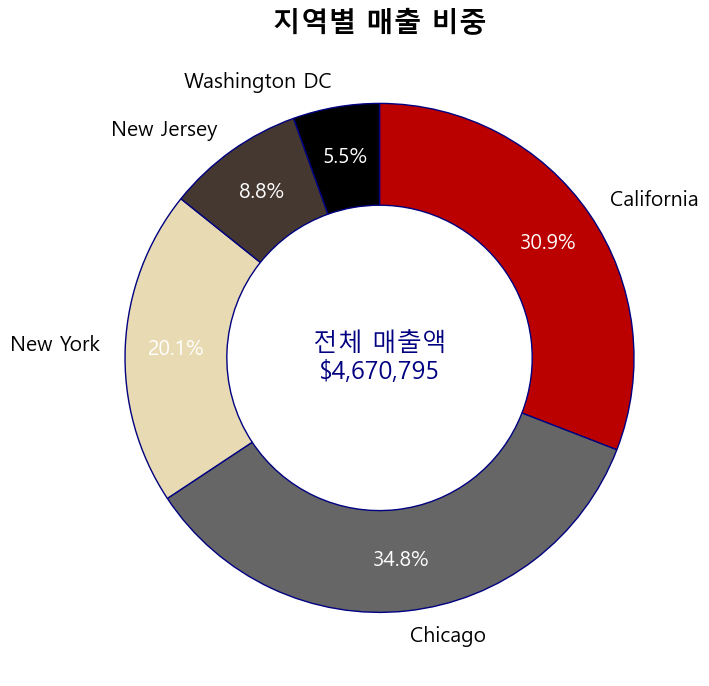

In [84]:
total_sales = df_region["지역별_매출액"].sum()

fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
colors = ['#BB0000', '#666666', '#E8DAB2', '#453831', '#000000']
pie_wedges, texts, autotexts, = ax.pie(df_region["매출비중"],
                                     startangle=90, counterclock=False,
                                     autopct="%.1f%%", pctdistance=0.8, colors=colors, 
                                     wedgeprops={"width":0.4, "ec":'navy'},                
                            )
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(15)

for i, (wedge, region) in enumerate(zip(pie_wedges, df_region["Region"])):
    angle = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1                 # theta2 : 끝 각도, theta : 시작 각도, 파이의 중간 위치 계산
    x = 1.1 * np.cos(np.deg2rad(angle))
    y = 1.1 * np.sin(np.deg2rad(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    ax.text(x, y, region, color="black", ha=horizontalalignment, va="center", fontsize=15)
    
ax.text(0, 0, f'전체 매출액\n${total_sales:,.0f}', ha='center', va='center', fontsize=18, color='navy')
plt.title('지역별 매출 비중', fontdict={'fontsize':20, "fontweight":"bold"})
plt.show()

In [43]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Region   5 non-null      object
 1   고객수      5 non-null      int64 
 2   고객수_비중   5 non-null      object
 3   지역별_주문수  5 non-null      object
 4   지역별_매출액  5 non-null      object
 5   매출비중     5 non-null      object
dtypes: int64(1), object(5)
memory usage: 368.0+ bytes


In [44]:
df_region['지역별_주문수'] = df_region['지역별_주문수'].astype(float)
df_region['지역별_매출액'] = df_region['지역별_매출액'].astype(float)

In [45]:
df_region['1인당_주문건수'] = round(df_region['지역별_주문수'] / df_region['고객수'], 2)
df_region['1인당_매출액'] = round(df_region['지역별_매출액'] / df_region['고객수'], 2)
df_region[['Region', '1인당_주문건수', '1인당_매출액']].sort_values('1인당_매출액', ascending=False)

,Region,1인당_주문건수,1인당_매출액
1,Chicago,20.36,3565.54
4,Washington DC,18.89,3410.30
0,California,17.37,3108.72
2,New York,17.24,2892.05
3,New Jersey,15.36,2749.44


- 워싱턴은 지역 고객수가 적지만 1인당 매출액이 높음. 성장 잠재력이 큰 지역이라고 볼 수 있음
    - 워싱턴 지역의 추가 고객 확보를 위한 마케팅
- 주문건수가 많을 수록 매출액이 높음 -> 주문건수를 높일 수 있는 방법 강구
- 시카고는 고객 숫자도 많고 주문건수와 매출액이 모두 높음

In [46]:
# mycursor.close()
# conn.close()